In [2]:
import imageio
from skimage.util.shape import view_as_windows


# from __future__ import print_function
from __future__ import division

import json
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import gzip
from scipy.misc import imsave, imread
import time
import scipy.ndimage


from scipy.ndimage import morphology
from numpy import linalg

import random
from itertools import islice
from scipy.ndimage.morphology import distance_transform_edt as edt


# Get Myelin Masks

In [33]:
def get_myelin_mask(input_path, output_path):
    mask = cv2.imread(input_path)
    
    myelin = (mask > 1) & (mask < 199)
    cv2.imwrite(output_path, myelin.astype(int))
        
        

In [34]:
for i in range(1, 5):
    input_path = "/home/malub_local/data/full_images/data" + str(i) + "/mask.png"
    output_path = "/home/malub_local/data/full_images/data" + str(i) + "/mask_myelin.png"
    get_myelin_mask(input_path, output_path)

(924, 1278, 3)
(344, 470, 3)
(468, 488, 3)
(344, 436, 3)


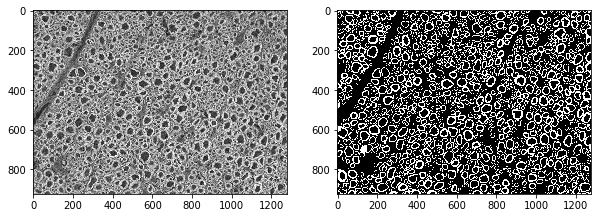

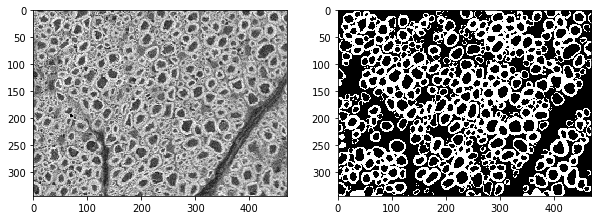

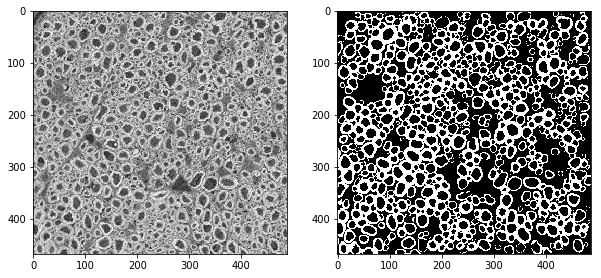

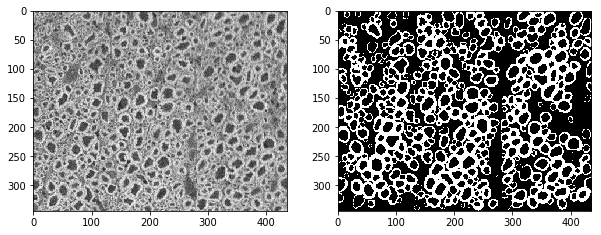

In [35]:
for i in range(1, 5):
    path_img = "/home/malub_local/data/full_images/data" + str(i) + "/image.png"
    path_mask = "/home/malub_local/data/full_images/data" + str(i) + "/mask_myelin.png"
    img = cv2.imread(path_img)
    mask = cv2.imread(path_mask)
    print(mask.shape)
    fig=plt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(cv2.imread(path_img), cmap = "gray")
    fig.add_subplot(1, 2, 2)
    plt.imshow(cv2.imread(path_mask)[:, :, 0], cmap = "gray")
plt.show()

# Patches creation

(924, 1278, 3)
(344, 470, 3)
(468, 488, 3)
(344, 436, 3)


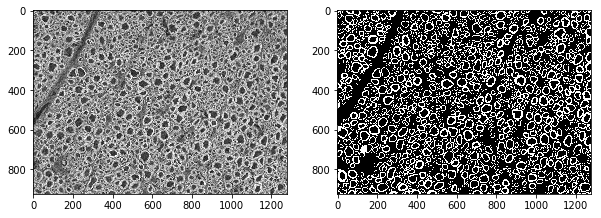

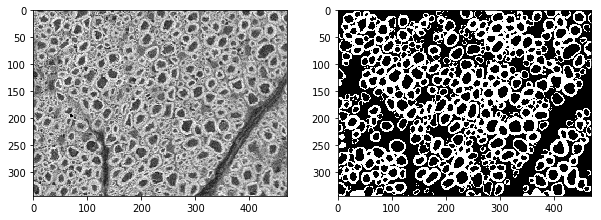

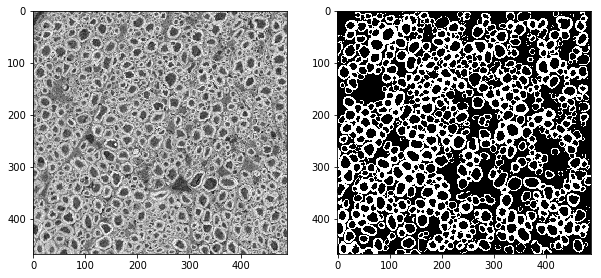

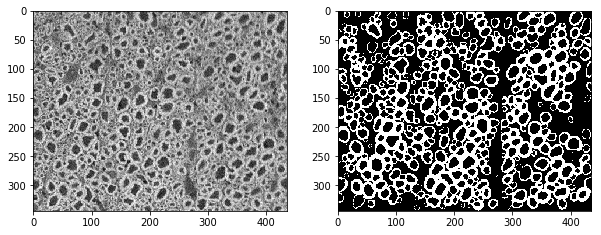

(15, 1, 256, 256)


In [53]:
window_shape = (256, 256)
patches_img = []
patches_mask = []
for i in range(1, 5):
    path_img = "/home/malub_local/data/full_images/data" + str(i) + "/image.png"
    path_mask = "/home/malub_local/data/full_images/data" + str(i) + "/mask_myelin.png"
    img = cv2.imread(path_img)
    mask = cv2.imread(path_mask)
    print(mask.shape)
    
    if len(img.shape) > 2 :
        img = img[:, :, 0]
    if len(mask.shape) > 2 :
        mask = mask[:, :, 1]
    
    view_as_window_img = view_as_windows(img, (256, 256), step=256)
    view_as_window_mask = view_as_windows(mask, (256, 256), step=256)
    window_size = view_as_window_img.shape
    
    for l in range(window_size[0]):
        for m in range(window_size[1]):
            patches_img.append(view_as_window_img[l, m])
            
    for l in range(window_size[0]):
        for m in range(window_size[1]):
            patches_mask.append(view_as_window_mask[l, m])

    fig=plt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img, cmap = "gray")
    fig.add_subplot(1, 2, 2)
    plt.imshow(mask, cmap = "gray")
plt.show()

    
    
# save patches as .npy
    
patches_img = np.expand_dims(np.asarray(patches_img), axis=1)
patches_mask = np.expand_dims(np.asarray(patches_mask), axis=1)
    
print(patches_img.shape)
    
path_images = "/home/malub_local/data/full_images/patches_img.npy"
path_masks =  "/home/malub_local/data/full_images/patches_mask.npy"

np.save(path_images, np.asarray(patches_img))
np.save(path_masks, np.asarray(patches_mask))

In [50]:
img_load = np.load("/home/malub_local/data/full_images/patches_mask.npy")
print(img_load.shape)

(15, 256, 256)


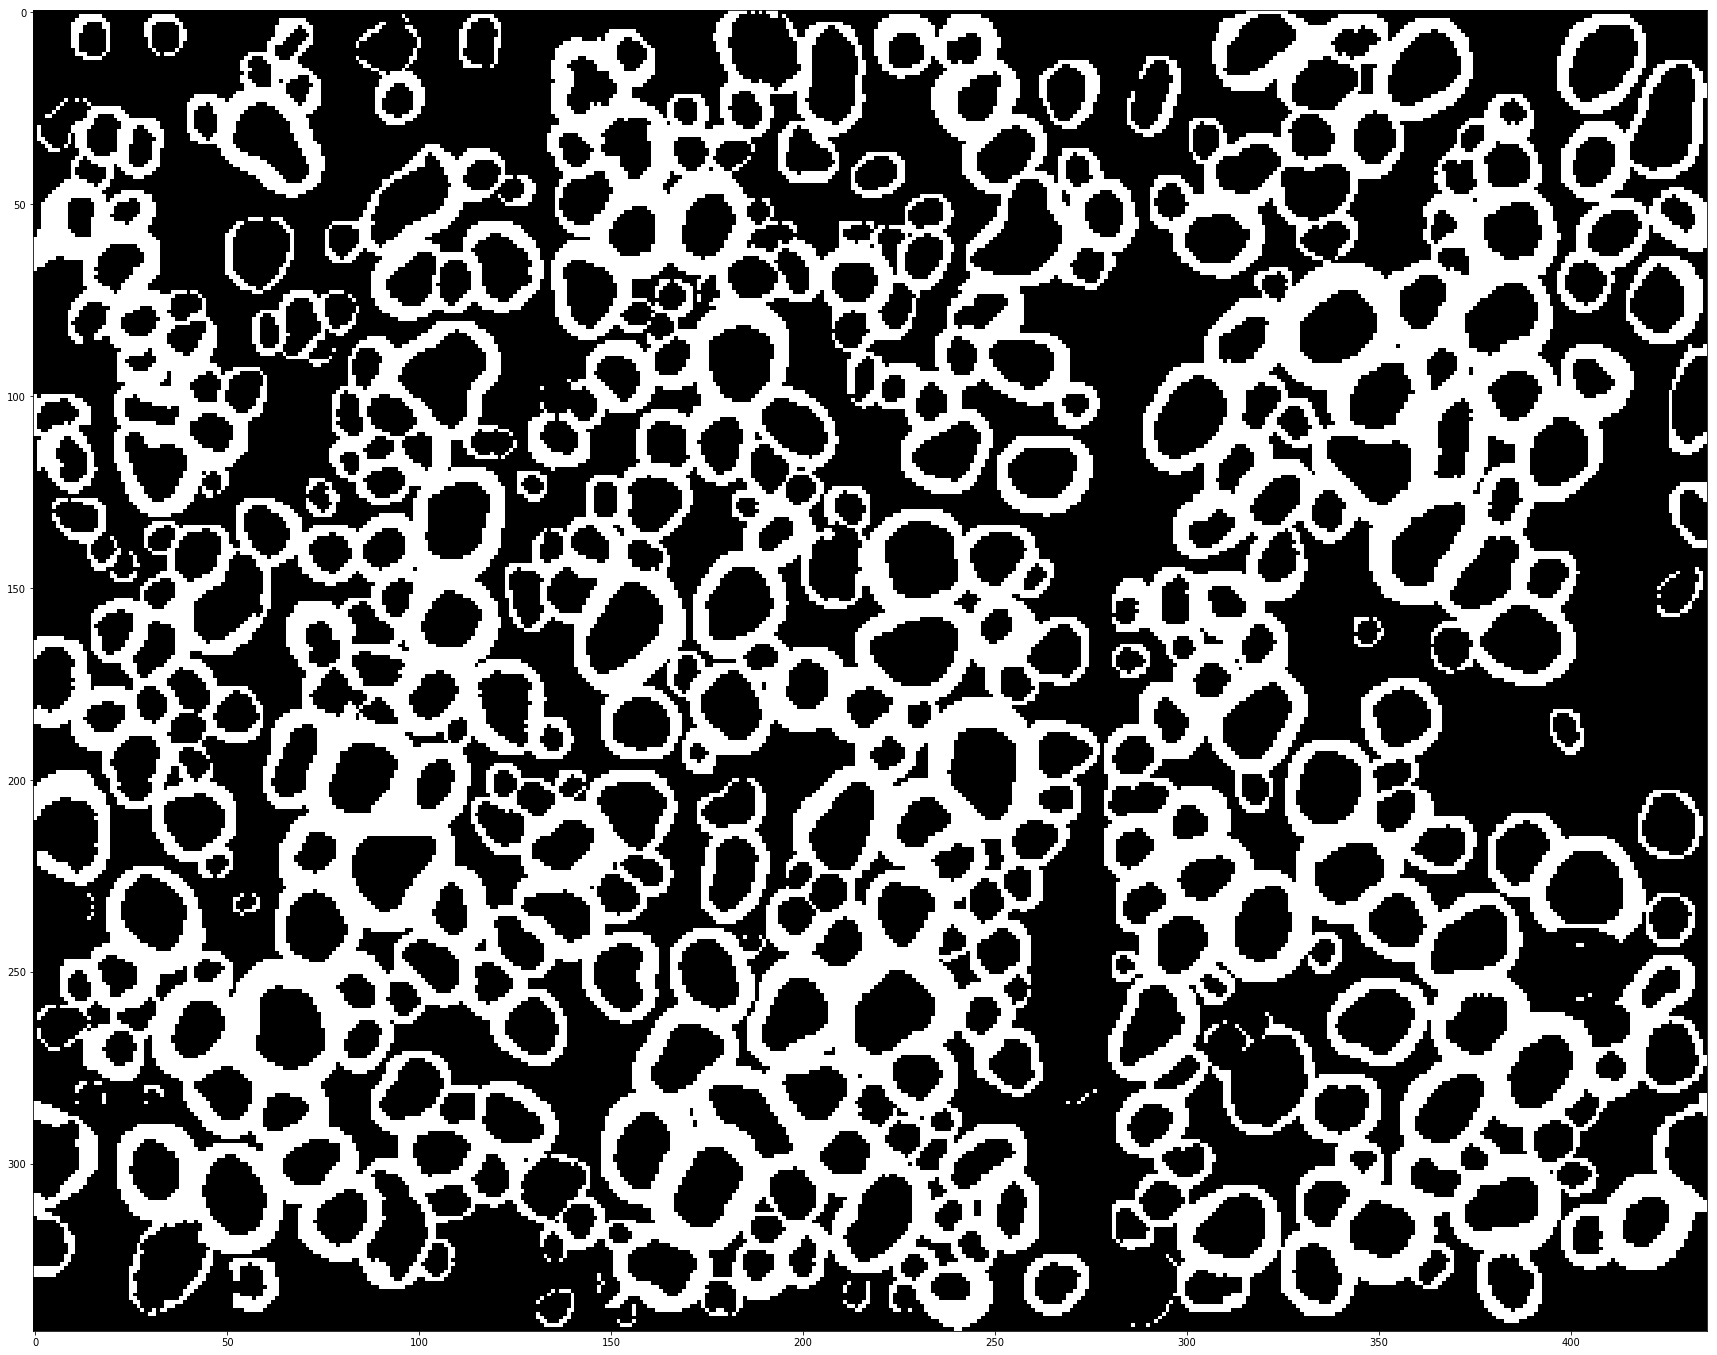

In [56]:
fig=plt.figure(figsize=(30, 30))
plt.imshow(mask, cmap = "gray")
plt.show()

In [59]:
r = np.arange(10)
r

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
p = [2, 4, 6, 8]

In [64]:
np.setdiff1d(r, p)

array([0, 1, 3, 5, 7, 9])